run this

In [1]:
%load_ext autoreload
%autoreload 2
# Enable imports form top-level of project (edit top_level_path accordingly)
import os
import sys
import inspect

top_level_path = os.path.abspath(os.path.join('..'))
if top_level_path not in sys.path:
	sys.path.append(top_level_path)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from longestpath.gen import gen_num_edges, gen_num_edges_undirected
from benchmarking import RandomParams, Benchmark, new_random_benchmark, Solver, new_graph_file_benchmark, new_benchmark
import re
from matplotlib.transforms import Affine2D

In [2]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
all_methods = [
  "brute('BRANCH_N_BOUND')",
  "brute('BRUTE_FORCE')",
  "brute('BRUTE_FORCE_COMPLETE')",
  "brute('FAST_BOUND')",
  "ilp()",
  "kalp()",
  "kalp(threads=4)"
]

method_name_dict = {
  "brute('BRANCH_N_BOUND')" : "Branch and bound",
  "brute('BRUTE_FORCE')" : "Brute force",
  "brute('BRUTE_FORCE_COMPLETE')" : "Brute force (complete)",
  "brute('FAST_BOUND')" : "Fast bound",
  "ilp()" : "ILP",
  "kalp()" : "KaLP single threaded",
  "kalp(threads=4)" : "KaLP on 4 threads",
}

color_assignment = {method : col for method, col in zip(all_methods, colors)}
color_assignment

{"brute('BRANCH_N_BOUND')": '#1f77b4',
 "brute('BRUTE_FORCE')": '#ff7f0e',
 "brute('BRUTE_FORCE_COMPLETE')": '#2ca02c',
 "brute('FAST_BOUND')": '#d62728',
 'ilp()': '#9467bd',
 'kalp()': '#8c564b',
 'kalp(threads=4)': '#e377c2'}

In [10]:
def generate():
  return [
    gen_num_edges_undirected(15, round(15 * degree / 2))
      for degree in np.arange(1.2, 3.7,0.2) for _ in range(1)
      # np.arange(1, 3.3, 0.3) for _ in range(1)
  ]

params_code = inspect.getsource(generate)
graphs = generate()

benchmark = new_benchmark(graphs, solvers=[
	Solver("brute", "FAST_BOUND"),
	Solver("brute", "BRUTE_FORCE"),
	Solver("brute", "BRANCH_N_BOUND"),
	Solver("brute", "BRUTE_FORCE_COMPLETE"),
  Solver("ilp"),
	Solver("kalp", threads=4),
	Solver("kalp"),
], params_code = params_code, override_benchmark_path="../benchmarks/test")

benchmark.benchmark_path


'../benchmarks/test(8)'

In [4]:
np.arange(1.2, 3.7,0.2)

array([1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6])

run this

In [3]:
benchmark = Benchmark.load("../final_benchmarks/all_methods_1.2-3.6_50_runs_latest/")

In [11]:
benchmark.run(retryFailures=True, timeout=5)


graph: 0.txt, solver: brute('FAST_BOUND') ... 

✅
length: 3, run_time: 4e-06
graph: 1.txt, solver: brute('FAST_BOUND') ... ✅
length: 3, run_time: 5e-06
graph: 2.txt, solver: brute('FAST_BOUND') ... ✅
length: 4, run_time: 5e-06
graph: 3.txt, solver: brute('FAST_BOUND') ... ✅
length: 8, run_time: 9e-06
graph: 4.txt, solver: brute('FAST_BOUND') ... ✅
length: 8, run_time: 1.4e-05
graph: 5.txt, solver: brute('FAST_BOUND') ... ✅
length: 10, run_time: 1.9e-05
graph: 6.txt, solver: brute('FAST_BOUND') ... ✅
length: 10, run_time: 1.3e-05
graph: 7.txt, solver: brute('FAST_BOUND') ... ✅
length: 12, run_time: 4.8e-05
graph: 8.txt, solver: brute('FAST_BOUND') ... ✅
length: 12, run_time: 2.6e-05
graph: 9.txt, solver: brute('FAST_BOUND') ... ✅
length: 14, run_time: 1.2e-05
graph: 10.txt, solver: brute('FAST_BOUND') ... ✅
length: 14, run_time: 0.000398
graph: 11.txt, solver: brute('FAST_BOUND') ... ✅
length: 12, run_time: 0.000298
graph: 12.txt, solver: brute('FAST_BOUND') ... ✅
length: 13, run_time: 0.000915
graph: 0.txt, solver: brute('BRUTE_FORC

run this and everything after

In [12]:
df = benchmark.get_dataframe()
df.head()

,path,run_time,length,solver,graph_id,status,objective_value,solver_name,failure,vertices,edges,average_out_degree
0,"[2, 5, 6, 11]",0.000004,3,0,0,NaN,NaN,brute('FAST_BOUND'),None,15,18,1.200000
1,"[0, 2, 1, 6]",0.000005,3,0,1,NaN,NaN,brute('FAST_BOUND'),None,15,20,1.333333
2,"[0, 13, 7, 11, 12]",0.000005,4,0,2,NaN,NaN,brute('FAST_BOUND'),None,15,24,1.600000
3,"[2, 5, 12, 13, 14, 7, 6, 8, 4]",0.000009,8,0,3,NaN,NaN,brute('FAST_BOUND'),None,15,26,1.733333
4,"[0, 4, 12, 8, 1, 2, 14, 9, 10]",0.000014,8,0,4,NaN,NaN,brute('FAST_BOUND'),None,15,30,2.000000


In [13]:
all_methods = sorted(list(set(df["solver_name"])))
all_methods

["brute('BRANCH_N_BOUND')",
 "brute('BRUTE_FORCE')",
 "brute('BRUTE_FORCE_COMPLETE')",
 "brute('FAST_BOUND')",
 'ilp()',
 'kalp()',
 'kalp(threads=4)']

run_time    Axes(0.125,0.11;0.775x0.77)
dtype: object

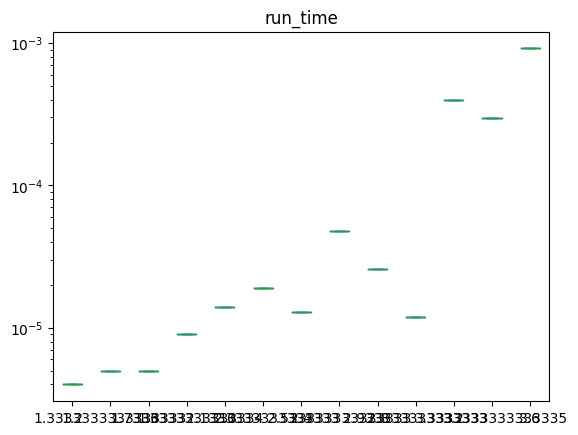

In [14]:
df[df["solver"] == 0][["run_time", "average_out_degree"]].plot.box(by="average_out_degree", logy=True)


In [15]:
def build_plotting_dataframes(benchmark: Benchmark):
  df = benchmark.get_dataframe()
  df_grouped = df \
    .groupby(['average_out_degree', 'solver', 'solver_name']) \
    .agg({
      "run_time": ["mean", "median", "std"], 
      "failure": "any"
    }) \
    .reset_index() \
    .rename(columns={"any": ""})

  df_grouped.columns = [a + ("_" + b if b != "" else "")  for (a,b) in df_grouped.columns]

  df_grouped_failures_removed = df_grouped[df_grouped["failure"] == False]
  to_plot = df_grouped_failures_removed.pivot(
    index='average_out_degree', 
    columns='solver_name', 
    values=['run_time_mean', 'run_time_std']
  ).reset_index()

  return df, df_grouped, df_grouped_failures_removed, to_plot

In [16]:
df, df_grouped, df_grouped_failures_removed, to_plot = build_plotting_dataframes(benchmark)

In [17]:
df_grouped_failures_removed.groupby(["solver_name"]).agg({"failure": "count"}).reset_index().rename(columns={"failure": "count"})

,solver_name,count
0,brute('BRANCH_N_BOUND'),13
1,brute('BRUTE_FORCE'),13
2,brute('BRUTE_FORCE_COMPLETE'),13
3,brute('FAST_BOUND'),13
4,ilp(),13
5,kalp(),13
6,kalp(threads=4),13


In [18]:
df_grouped_failures_removed.head()

,average_out_degree,solver,solver_name,run_time_mean,run_time_median,run_time_std,failure
0,1.2,0,brute('FAST_BOUND'),0.000004,0.000004,NaN,False
1,1.2,1,brute('BRUTE_FORCE'),0.000003,0.000003,NaN,False
2,1.2,2,brute('BRANCH_N_BOUND'),0.000006,0.000006,NaN,False
3,1.2,3,brute('BRUTE_FORCE_COMPLETE'),0.000004,0.000004,NaN,False
4,1.2,4,ilp(),0.096689,0.096689,NaN,False


In [19]:
to_plot.head()


average_out_degree           run_time_mean                       \
solver_name                    brute('BRANCH_N_BOUND') brute('BRUTE_FORCE')   
0                     1.200000                0.000006             0.000003   
1                     1.333333                0.000004             0.000003   
2                     1.600000                0.000005             0.000004   
3                     1.733333                0.000007             0.000004   
4                     2.000000                0.000071             0.000017   

                                                                         \
solver_name brute('BRUTE_FORCE_COMPLETE') brute('FAST_BOUND')     ilp()   
0                                0.000004            0.000004  0.096689   
1                                0.000004            0.000005  0.093076   
2                                0.000004            0.000005  0.104899   
3                                0.000008            0.000009  0.153216   
4                                0.000027            0.000014  0.123397   

                                                 run_time_std  \
solver_name    kalp() kalp(threads=4) brute('BRANCH_N_BOUND')   
0            0.221669        0.255994                     NaN   
1            0.243637        0.253042                     NaN   
2            0.241332        0.272932                     NaN   
3            0.291412        0.316496                     NaN   
4            0.293642        0.313422                     NaN   

                                                                \
solver_name brute('BRUTE_FORCE') brute('BRUTE_FORCE_COMPLETE')   
0                            NaN                           NaN   
1                            NaN                           NaN   
2                            NaN                           NaN   
3                            NaN                           NaN   
4                            NaN                           NaN   

                                                              
solver_name brute('FAST_BOUND') ilp() kalp() kalp(threads=4)  
0                           NaN   NaN    NaN             NaN  
1                           NaN   NaN    NaN             NaN  
2                           NaN   NaN    NaN             NaN  
3                           NaN   NaN    NaN             NaN  
4                           NaN   NaN    NaN             NaN

In [20]:
def setup_info(to_plot):
    plt.title('Running time by average degree')
    plt.ylabel("run-time (seconds)")
    plt.xlabel("mean degree")
    methods = list(to_plot.columns.droplevel())
    plt.legend([method_name_dict[m] for m in methods[1:len(methods)//2+1]], loc='center left', bbox_to_anchor=(1, 0.5))
  
def plt_with_scatter(benchmark, offset_arg = None):
    df, df_grouped, df_grouped_failures_removed, to_plot = build_plotting_dataframes(benchmark)

    fig, ax = plt.subplots()

    to_plot.plot(
        style="o-", 
        x="average_out_degree", 
        y="run_time_mean", 
        color=color_assignment, 
        ax=ax
    )

    offsets = offset_arg if offset_arg != None else [0 for _ in benchmark.solver_names()]

    for offset, solver_name in zip(offsets, benchmark.solver_names()):
        solver_df = df[df["solver_name"] == solver_name]  # Select rows where run-time is not null
        plt.scatter(
            solver_df['average_out_degree'] + offset,  
            solver_df['run_time'], 
            label=solver_name, 
            alpha=0.2, 
            s=7,
            color=color_assignment[solver_name]
        )
    setup_info(to_plot)


def plot_with_symmetric_errbars(benchmark, offsets_arg = None):
    df, df_grouped, df_grouped_failures_removed, to_plot = build_plotting_dataframes(benchmark)

    fig, ax = plt.subplots()

    to_plot.plot(
        style="o-",
        x="average_out_degree",
        y="run_time_mean", 
        color=color_assignment,
        ax=ax,
    )

    offsets = offsets_arg if offsets_arg != None else [0 for _ in benchmark.solver_names()]

    for offset, solver_name in zip(offsets, benchmark.solver_names()):
        plt.errorbar(
        to_plot['average_out_degree'] + offset,
        to_plot['run_time_mean'][solver_name],
        yerr = to_plot['run_time_std'][solver_name],
        fmt='none',
        capsize=3,
        alpha=0.5,
        color=color_assignment[solver_name],
        )
    setup_info(to_plot)


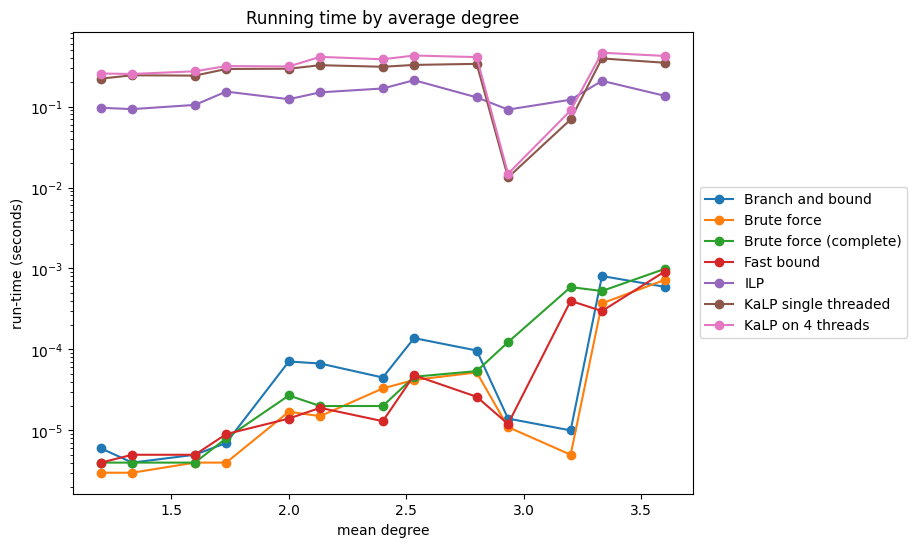

In [21]:
plt_with_scatter(benchmark)

plt.yscale('log')

plt.gcf().set_size_inches(8, 6)

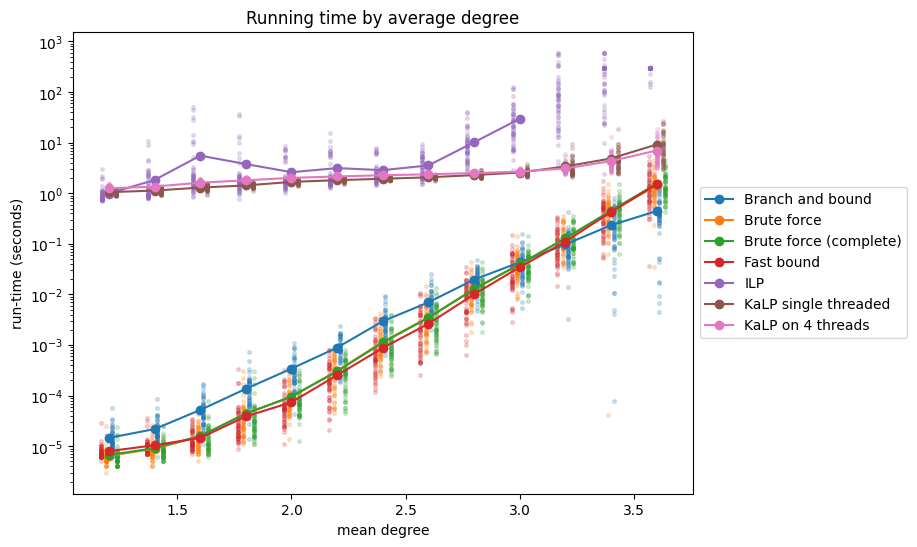

In [14]:
plt_with_scatter(benchmark, list(np.linspace(-0.035,0.035,4)) + list(np.linspace(-0.03,0.03,3)))

plt.yscale("log")
plt.gcf().set_size_inches(8, 6)
plt.savefig(os.path.join(benchmark.benchmark_path, "plot.png"), dpi=400, bbox_inches='tight')

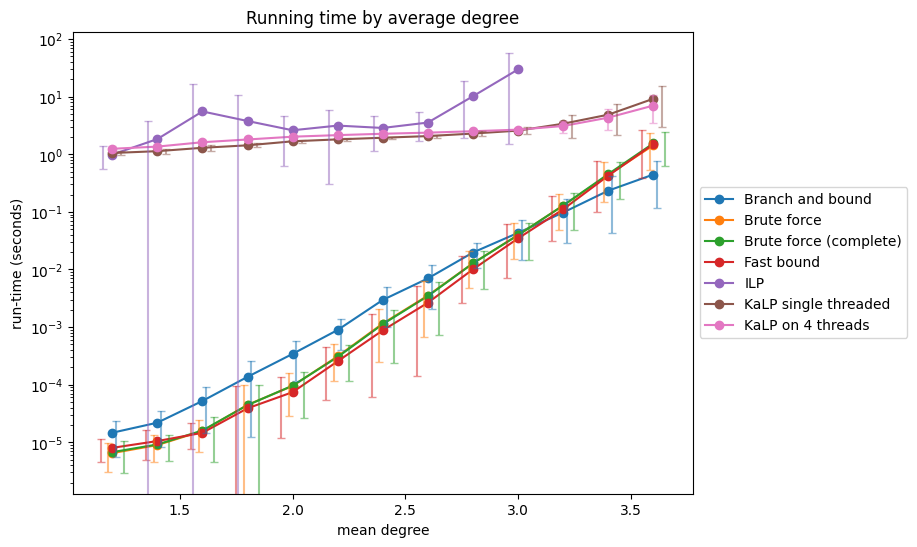

In [15]:
plot_with_symmetric_errbars(benchmark, list(np.linspace(-0.05,0.05,4)) + list(np.linspace(-0.04,0.04,3)))

plt.yscale("log")

plt.gcf().set_size_inches(8, 6)